### **Splitting Data for PCA**

Splitting the data into training, validation, and test sets

- splitting the data into two sets: a training set and a test set. The suggested split is 70% for the training set and 30% for the test set.

- splitting the training set further into a training set and a validation set. The suggested split is 90% for the training set and 10% for the validation set.

This way, we will have three sets of data: a training set to train our model (70% of the original dataset), a validation set to tune the hyperparameters of our model (10% of the original dataset), and a test set to evaluate the final performance of our model (20% of the original dataset).

In [ ]:

# Extract the input attributes and target variable
#X_pca = X_principal_a.iloc[:, :-1]
#y_pca = X_principal_a.iloc[:, -1]
# Split the data into training, validation, and test sets

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Features, target, test_size=0.2, random_state=42)
X_train_pca, X_val_pca, y_train_pca,y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.125, random_state=42)

# The training set now has 70% of the data
# The validation set has 10% of the data
# The test set has 20% of the data


In [ ]:
# Print the shapes of the training, validation, and test sets :
print(f'X_train shape: {X_train_pca.shape}')
print(f'X_val shape: {X_val_pca.shape}')
print(f'X_test shape: {X_test_pca.shape}')


X_train shape: (343, 13)
X_val shape: (49, 13)
X_test shape: (98, 13)


## **Principal Component Analysis**

---


Principal component analysis works by finding a smaller set of column values from an uncorrelated larger set. This method works by representing independent, uncorrelated features as a sum of the original features.

Let’s start by importing the **PCA package** from Sklearn. We will also need the **StandardScaler** method from the preprocessing module in Sklearn.

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from datetime import datetime

**Next** , let’s scale our data using the standardScaler method. This step helps with numerical stability when the algorithm computes the components

In [ ]:

# Standardize data
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = Features.columns

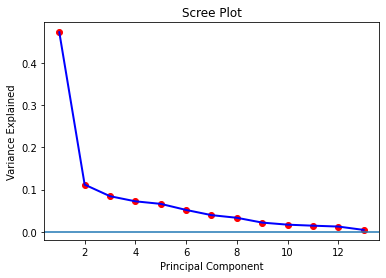

In [ ]:
#detrimnne number of components

import numpy as np
pca = PCA(n_components = None)
X_principal = pca.fit_transform(X_train_pca)
X_principal = pd.DataFrame(X_principal)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, '-', linewidth=2, color='blue')
plt.scatter(PC_values, pca.explained_variance_ratio_,color='red')
plt.axhline()
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The x-axis displays the **principal component** and the y-axis displays the **percentage of total variance explained** by each individual principal component.




In [ ]:
# percentage of total variance explained by each principal component
print([round(num, 2) for num in (pca.explained_variance_ratio_*100).tolist()])

[47.2, 11.16, 8.42, 7.21, 6.6, 5.17, 3.94, 3.31, 2.18, 1.69, 1.45, 1.24, 0.44]


**We can see:**



*   The first principal component explains 47.13% of the total variation in the dataset.
*   The second principal component explains 11.16% of the total variation.
*The third principal component explains 8.54% of the total variation.
*The fourth principal component explains 7.22% of the total variation
*The fiveth principal component explains 6.55% of the total variation

 and etc......

**Note that the percentages sum to 100%.**







In [ ]:
print(str(round(sum(pca.explained_variance_ratio_)*100,2))+"%")

100.0%


**The first principal component** of a set of variables is the standardized linear combination of the original variables with the largest variance among all linear combinations (47.13%). **The second principal component** is the standardized linear combination of original variables with the largest variance
 (11.16%) among all remaining linear combinations, given that the second principal component is not correlated with the first principal component.

**Next,** let us try the threshold of variance explained approach. In this case, we hold on to principal components that explain **at least 70%** of the variance cumulatively.  (**With more than fiveth principal component**), the cumulative proportion of the variance explained surpasses 70%, therefore we would consider to keep **fiveth** principal components.  If a higher threshold were used, then additional principal components would have to be retained.



In [ ]:
for i in range (1,11):
  print(f"in the {i}th "+"the cumulative proportion of the variance explained surpasses : "+str(round(sum(pca.explained_variance_ratio_[:i])*100,2))+"%")

in the 1th the cumulative proportion of the variance explained surpasses : 47.2%
in the 2th the cumulative proportion of the variance explained surpasses : 58.35%
in the 3th the cumulative proportion of the variance explained surpasses : 66.77%
in the 4th the cumulative proportion of the variance explained surpasses : 73.98%
in the 5th the cumulative proportion of the variance explained surpasses : 80.58%
in the 6th the cumulative proportion of the variance explained surpasses : 85.75%
in the 7th the cumulative proportion of the variance explained surpasses : 89.69%
in the 8th the cumulative proportion of the variance explained surpasses : 93.01%
in the 9th the cumulative proportion of the variance explained surpasses : 95.18%
in the 10th the cumulative proportion of the variance explained surpasses : 96.87%


In [ ]:
pca_a = PCA(n_components = 5)
X_train_pca = pca_a.fit_transform(X_train_pca)
X_test_pca = pca_a.transform(X_test_pca)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = ['P1', 'P2','P3','P4','P5']
X_train_pca

,P1,P2,P3,P4,P5
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904
1,4.203886,0.826954,-0.184688,0.345148,0.180703
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991
3,-2.459325,0.605754,0.953015,-0.350154,0.671776
4,2.974754,0.849244,1.650239,-0.279261,-1.425614
...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165
339,2.683602,-1.042976,1.553335,3.676643,-0.663386
340,0.908952,-0.869522,1.168289,-1.142270,1.319399
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287


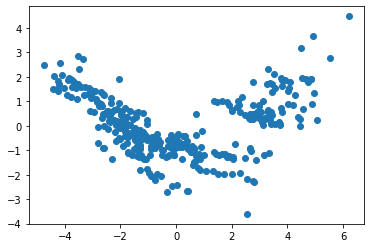

In [ ]:
plt.scatter(X_train_pca['P1'],X_train_pca['P2'])

### **Splitting data before PCA**


---



In [ ]:
# Extract the input attributes and target variable
X = boston_df.iloc[:, :-1]
y = boston_df.iloc[:, -1]

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train,y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# The training set now has 70% of the data
# The validation set has 10% of the data
# The test set has 20% of the data
''

''